Perform all the below tasks as mentioned :
Task 1

Parts of Speech tagging (using library)
1. Write a function that takes a sentence as input and returns the list of words along with their corresponding parts of speech.
2. Create visualizations (like bar charts) to represent your findings.

Task 2
Relation extraction
1. Implement a basic relation extraction system using SpaCy or any other library.
2. Define a set of relations to extract (e.g., "works for", "is a", "located in").
3. Write a function that extracts these relations from a sample dataset.

Task 3
Combining

Parts of Speech tagging and

Relation extraction
1. Write a program that combines parts of speech tagging with relation extraction.
2. For each extracted relation, provide the parts of speech of the involved entities.
3. Summarize your findings in a few points while discussing the significance of parts of speech tagging and relation extraction in understanding text semantics.

Task 4
Parts of Speech tagging (without using the library)
1. Create a  Simple lexicon: Create a dictionary that maps words to their possible parts of speech. (According to the sample dataset provided)
for eg :
# Simple lexicon for demonstration purposeslexicon = {
    'Apple': 'NNP',  # proper noun
    'Inc.': 'NNP',
    'is': 'VBZ',  # verb
    'a': 'DT',  # determiner
    'technology': 'NN',  # noun
    'company': 'NN',
    'based': 'VBD',  # verb (past)
    'in': 'IN',  # preposition
    'Cupertino': 'NNP',
    'California': 'NNP',
    'Tim': 'NNP',
    'Cook': 'NNP',
    'the': 'DT',
    'CEO': 'NNP',
    'since': 'IN',
    '2011': 'CD',  # cardinal number
    'The': 'DT',
    'iPhone': 'NNP',
    'was': 'VBD',
    'released': 'VBD',
    '2007': 'CD',
    'and': 'CC',  # conjunction
    'has': 'VBZ',
    'revolutionized': 'VBD',
    'smartphone': 'NN',
    'industry': 'NN',
    'Microsoft': 'NNP',
    'Corporation': 'NNP',
    'located': 'VBD',
    'Redmond': 'NNP',
    'Washington': 'NNP',
    'Satya': 'NNP',
    'Nadella': 'NNP',
   # Add more words as needed
}


2. Create a function that takes a sentence, tokenizes it, and tags each word based on the lexicon.  

3. Handling Unknown Words
You may want to implement some basic rules for words not found in the lexicon. For example, you might classify them as nouns by default.

4. Finally, compare both parts of speech tagging (with and without the library ) by visualizing through a graph plot.

Please upload Task(1-3)_sample_dataset.txt...


Saving Task(1-3)_sample_dataset.txt to Task(1-3)_sample_dataset.txt

Please upload Task_4_POS_tagging_sample_test(without library).txt...


Saving Task_4_POS_tagging_sampe_test(without library).txt to Task_4_POS_tagging_sampe_test(without library).txt

Task 1: POS Tagging with Library

Sample POS Tags (first 10):
Google: PROPN
LLC: PROPN
is: AUX
an: DET
American: ADJ
multinational: ADJ
technology: NOUN
company: NOUN
that: PRON
specializes: VERB


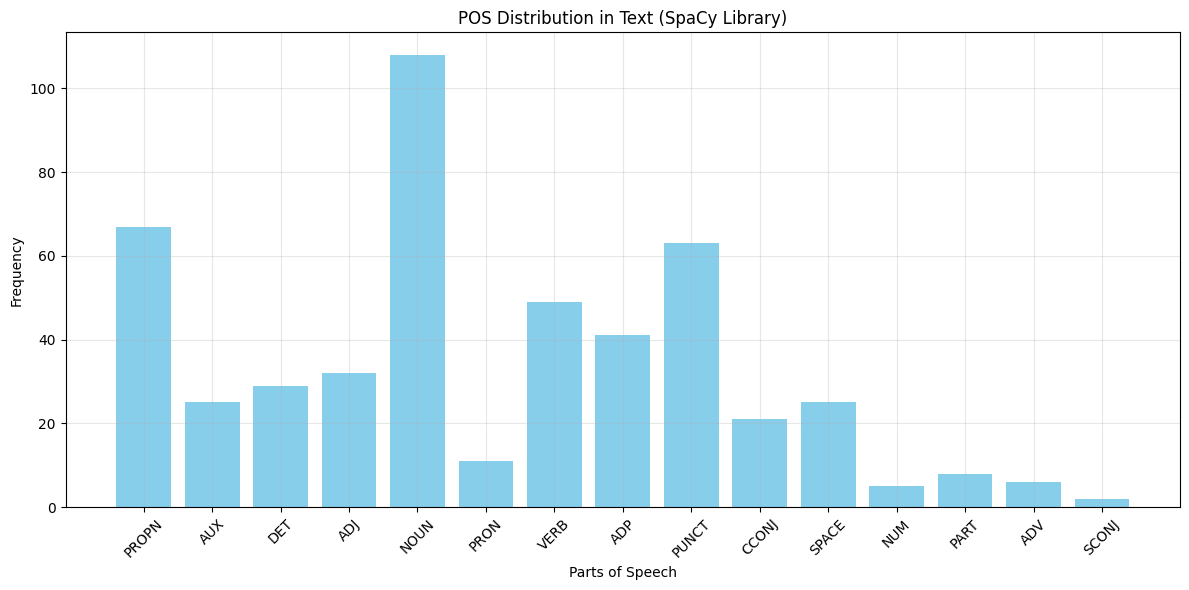


POS Tag Distribution:
NOUN: 108
PROPN: 67
PUNCT: 63
VERB: 49
ADP: 41
ADJ: 32
DET: 29
AUX: 25
SPACE: 25
CCONJ: 21
PRON: 11
PART: 8
ADV: 6
NUM: 5
SCONJ: 2

Task 2: Relation Extraction

Sample Extracted Relations (first 5):
Subject: LLC
Relation: is
Object: company
In sentence: Google LLC is an American multinational technology company that specializes in Internet-related services and products.

Subject: company
Relation: is
Object: 
In sentence: Google LLC is an American multinational technology company that specializes in Internet-related services and products.

Subject: that
Relation: specializes
Object: 
In sentence: Google LLC is an American multinational technology company that specializes in Internet-related services and products.

Subject: mission
Relation: is
Object: 
In sentence: The company's mission is to organize the world's information and make it universally accessible and useful.

Subject: information
Relation: organize
Object: 
In sentence: The company's mission is to or

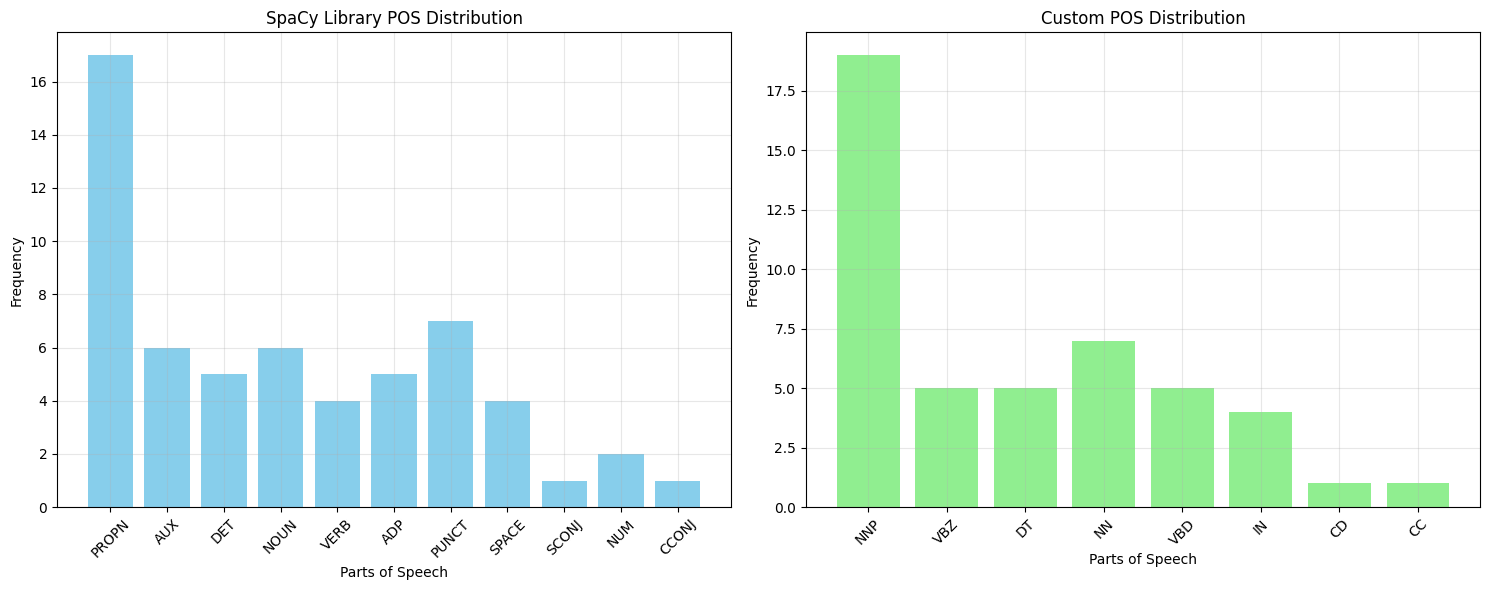


Comparison of POS Tagging Methods:

Library-based tags distribution:
PROPN: 17
PUNCT: 7
AUX: 6
NOUN: 6
DET: 5
ADP: 5
VERB: 4
SPACE: 4
NUM: 2
SCONJ: 1
CCONJ: 1

Custom tags distribution:
NNP: 19
NN: 7
VBZ: 5
DT: 5
VBD: 5
IN: 4
CD: 1
CC: 1


In [22]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from typing import List, Tuple, Dict
import numpy as np
from google.colab import files
import io

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

class TextAnalyzer:
    def __init__(self):
        self.lexicon = {
            'Apple': 'NNP', 'Inc.': 'NNP', 'is': 'VBZ', 'a': 'DT',
            'technology': 'NN', 'company': 'NN', 'based': 'VBD',
            'in': 'IN', 'Cupertino': 'NNP', 'California': 'NNP',
            'Tim': 'NNP', 'Cook': 'NNP', 'the': 'DT', 'CEO': 'NNP',
            'since': 'IN', '2011': 'CD', 'The': 'DT', 'iPhone': 'NNP',
            'was': 'VBD', 'released': 'VBD', '2007': 'CD', 'and': 'CC',
            'has': 'VBZ', 'revolutionized': 'VBD', 'smartphone': 'NN',
            'industry': 'NN', 'Microsoft': 'NNP', 'Corporation': 'NNP',
            'located': 'VBD', 'Redmond': 'NNP', 'Washington': 'NNP',
            'Satya': 'NNP', 'Nadella': 'NNP'
        }

    def read_file(self, file_content: str) -> str:
        """Read and clean text from file content"""
        # Remove line numbers and clean text
        cleaned_text = re.sub(r'^\d+\.\s*', '', file_content, flags=re.MULTILINE)
        return cleaned_text

    def pos_tag_with_library(self, text: str) -> List[Tuple[str, str]]:
        """Task 1: POS tagging using SpaCy"""
        doc = nlp(text)
        tags = [(token.text, token.pos_) for token in doc]
        print("\nSample POS Tags (first 10):")
        for token, pos in tags[:10]:
            print(f"{token}: {pos}")
        return tags

    def visualize_pos_distribution(self, pos_tags: List[Tuple[str, str]], title: str):
        """Create visualization for POS distribution"""
        pos_counts = Counter([tag for _, tag in pos_tags])
        plt.figure(figsize=(12, 6))
        plt.bar(pos_counts.keys(), pos_counts.values(), color='skyblue')
        plt.title(title)
        plt.xlabel('Parts of Speech')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Print counts
        print("\nPOS Tag Distribution:")
        for pos, count in pos_counts.most_common():
            print(f"{pos}: {count}")

    def extract_relations(self, text: str) -> List[Dict]:
        """Task 2: Relation extraction using SpaCy"""
        doc = nlp(text)
        relations = []

        for sent in doc.sents:
            for token in sent:
                if token.dep_ in ['nsubj', 'attr', 'dobj']:
                    # Get the object from token's children
                    obj_tokens = [child for child in token.head.children
                                if child.dep_ in ['dobj', 'pobj', 'attr'] and child != token]
                    obj_text = obj_tokens[0].text if obj_tokens else ''

                    relation = {
                        'subject': token.text,
                        'relation': token.head.text,
                        'object': obj_text,
                        'sentence': sent.text.strip()
                    }
                    relations.append(relation)

        # Print sample relations
        print("\nSample Extracted Relations (first 5):")
        for rel in relations[:5]:
            print(f"Subject: {rel['subject']}")
            print(f"Relation: {rel['relation']}")
            print(f"Object: {rel['object']}")
            print(f"In sentence: {rel['sentence']}\n")

        return relations

    def combine_pos_and_relations(self, text: str) -> List[Dict]:
        """Task 3: Combining POS tagging with relation extraction"""
        doc = nlp(text)
        combined_analysis = []

        for sent in doc.sents:
            sent_analysis = {
                'sentence': sent.text.strip(),
                'relations': [],
                'pos_tags': []
            }

            # Get POS tags for the sentence
            sent_analysis['pos_tags'] = [(token.text, token.pos_) for token in sent]

            # Extract relations
            for token in sent:
                if token.dep_ in ['nsubj', 'attr', 'dobj']:
                    obj_tokens = [child for child in token.head.children
                                if child.dep_ in ['dobj', 'pobj', 'attr'] and child != token]
                    obj_text = obj_tokens[0].text if obj_tokens else ''
                    obj_pos = obj_tokens[0].pos_ if obj_tokens else ''

                    relation = {
                        'subject': (token.text, token.pos_),
                        'relation': (token.head.text, token.head.pos_),
                        'object': (obj_text, obj_pos)
                    }
                    sent_analysis['relations'].append(relation)

            combined_analysis.append(sent_analysis)

        # Print sample analysis
        print("\nSample Combined Analysis (first 2 sentences):")
        for analysis in combined_analysis[:2]:
            print(f"\nSentence: {analysis['sentence']}")
            print("POS Tags:", analysis['pos_tags'][:5], "...")
            print("Relations:")
            for rel in analysis['relations']:
                print(f"  {rel['subject'][0]}({rel['subject'][1]}) -> "
                      f"{rel['relation'][0]}({rel['relation'][1]}) -> "
                      f"{rel['object'][0]}({rel['object'][1]})")

        return combined_analysis

    def pos_tag_without_library(self, text: str) -> List[Tuple[str, str]]:
        """Task 4: Custom POS tagging without library"""
        # Tokenize the text (simple tokenization)
        words = text.split()

        # Tag each word
        tags = []
        for word in words:
            # Remove punctuation
            clean_word = re.sub(r'[^\w\s]', '', word)
            if not clean_word:
                continue

            # Check if word is in lexicon
            if word in self.lexicon:
                tags.append((word, self.lexicon[word]))
            else:
                # Simple rules for unknown words
                if word[0].isupper():
                    tags.append((word, 'NNP'))  # Proper noun
                elif word.lower() in ['a', 'an', 'the']:
                    tags.append((word, 'DT'))   # Determiner
                elif word.lower().endswith(('ed', 'ing')):
                    tags.append((word, 'VBD'))  # Verb
                else:
                    tags.append((word, 'NN'))   # Default to noun

        print("\nCustom POS Tagging Results (first 10):")
        for word, tag in tags[:10]:
            print(f"{word}: {tag}")

        return tags

    def compare_pos_methods(self, text: str):
        """Compare library and custom POS tagging"""
        library_tags = self.pos_tag_with_library(text)
        custom_tags = self.pos_tag_without_library(text)

        # Create comparison visualization
        plt.figure(figsize=(15, 6))

        # Library-based tags
        plt.subplot(1, 2, 1)
        lib_pos_counts = Counter([tag for _, tag in library_tags])
        plt.bar(lib_pos_counts.keys(), lib_pos_counts.values(), color='skyblue')
        plt.title('SpaCy Library POS Distribution')
        plt.xlabel('Parts of Speech')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)

        # Custom tags
        plt.subplot(1, 2, 2)
        custom_pos_counts = Counter([tag for _, tag in custom_tags])
        plt.bar(custom_pos_counts.keys(), custom_pos_counts.values(), color='lightgreen')
        plt.title('Custom POS Distribution')
        plt.xlabel('Parts of Speech')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Print comparison statistics
        print("\nComparison of POS Tagging Methods:")
        print("\nLibrary-based tags distribution:")
        for pos, count in lib_pos_counts.most_common():
            print(f"{pos}: {count}")

        print("\nCustom tags distribution:")
        for pos, count in custom_pos_counts.most_common():
            print(f"{pos}: {count}")

        return library_tags, custom_tags

def main():
    analyzer = TextAnalyzer()

    print("Please upload Task(1-3)_sample_dataset.txt...")
    uploaded = files.upload()
    task1_3_filename = next(iter(uploaded))
    text1_3 = analyzer.read_file(uploaded[task1_3_filename].decode('utf-8'))

    print("\nPlease upload Task_4_POS_tagging_sample_test(without library).txt...")
    uploaded = files.upload()
    task4_filename = next(iter(uploaded))
    text4 = analyzer.read_file(uploaded[task4_filename].decode('utf-8'))

    # Task 1: POS Tagging with Library
    print("\nTask 1: POS Tagging with Library")
    pos_tags = analyzer.pos_tag_with_library(text1_3)
    analyzer.visualize_pos_distribution(pos_tags, "POS Distribution in Text (SpaCy Library)")

    # Task 2: Relation Extraction
    print("\nTask 2: Relation Extraction")
    relations = analyzer.extract_relations(text1_3)

    # Task 3: Combined Analysis
    print("\nTask 3: Combined POS and Relation Analysis")
    combined = analyzer.combine_pos_and_relations(text1_3)

    # Task 4: Custom POS Tagging and Comparison
    print("\nTask 4: Custom POS Tagging and Comparison")
    library_tags, custom_tags = analyzer.compare_pos_methods(text4)

if __name__ == "__main__":
    main()